In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签, 有中文出现的情况，需要u'内容'
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})

# 定义问题

假设有一个回归问题:
给定数据集$\{x^i,y^i\}_{i=1}^N$, 其中$x^i=(x^i_1,x^i_2) \in \mathbb{R}^2$,$y^i \in \mathbb{R}$   

回归模型 $y = w^Tx=w_1x_1+w_2 x_2$ (设模型的bias为0）  

损失函数取为均方误差 $L(w_1,w_2) = \frac{1}{N} \sum_{i=1}^N L_i(x^i,y^i)  = \frac{1}{N} \sum_{i=1}^N (w_1x_1^i+w_2 x_2^i-y^i)^2$


# 构造数据

数据点根据线性回归 $y=0.1 x_1+0.2 x_2+\epsilon$，

其中  
-  $x_1 \sim 1*N(0,1)$
- $x_2 \sim 10*N(0,1)$
- $\epsilon$为噪音, 分布为 $\epsilon \sim N(0,1)$  



In [3]:
np.random.seed(20)
N = 200
x1s,x2s = 1*np.random.randn(N,1),10*np.random.randn(N,1)
ys = x1s*0.1+x2s*0.2+np.random.randn(N,1)

定义每一个点的损失函数$L_i(x^i,y^i)$  

为了可视化损失函数在某一个方向上的几何形状，同时定义了在$w_1$和$w_2$截面上的损失函数 `funw2`和`funw1`



In [4]:
def fun(w1,w2,x1,x2,y):
    return (w1*x1+w2*x2-y)**2

def funw1(w1,x1,x2,y):
    return  fun(w1,0.2,x1,x2,y)

def funw2(w2,x1,x2,y):
    return  fun(0.1,w2,x1,x2,y)

# 可视化损失函数

##  可视化原始数据的损失函数

In [5]:
w1 = np.arange(-10,10,0.01)
w2 = np.arange(-4,4,0.01)
W1,W2= np.meshgrid(w1,w2)

In [6]:
L = np.zeros_like(W1)
for x1,x2,y in zip(x1s,x2s,ys):
    L += fun(W1,W2,x1,x2,y)
L = L/N

In [7]:
Lw1 = np.zeros_like(w1)
for x1,x2,y in zip(x1s,x2s,ys):
    Lw1 += funw1(w1,x1,x2,y)
Lw1 = Lw1/N


In [8]:
Lw2 = np.zeros_like(w2)
for x1,x2,y in zip(x1s,x2s,ys):
    Lw2 += funw2(w2,x1,x2,y)
Lw2 = Lw2/N

In [9]:
# 存下来，后面使用
W1_,W2_,L_ = W1,W2,L

(0, 100)

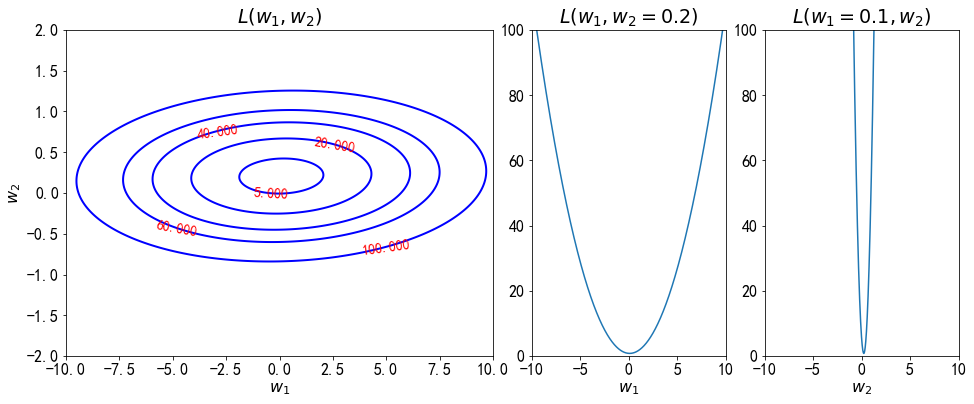

In [10]:
mpl.rcParams.update({'font.size': 16})
fig,ax = plt.subplots(1,4,figsize=(16,6))
gs = gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0,2])
ax3 = plt.subplot(gs[0,3])
levels = np.array([5,20,40,60,100])
CS = ax1.contour(W1,W2,L,levels,linewidths=2,colors="blue")
ax1.clabel(CS,inline=False,fontsize=14,colors='red')
ax1.set_xlabel(r'$w_1$')
ax1.set_ylabel(r'$w_2$')
ax1.set_title(r'$L(w_1,w_2)$')
ax1.set_xlim([-10,10])
ax1.set_ylim([-2,2])


ax2.plot(w1,Lw1)
ax2.set_title(r'$L(w_1,w_2=0.2)$')
ax2.set_xlabel(r'$w_1$')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,100])

ax3.plot(w2,Lw2)
ax3.set_title(r'$L(w_1=0.1,w_2)$')
ax3.set_xlabel(r'$w_2$')
ax3.set_xlim([-10,10])
ax3.set_ylim([0,100])


##  可视化标准化数据的损失函数

对数据集$\{z^i\}_{i=1}^N, z^i\in \mathbb{R}$标准化  
  
$\tilde{z}^i = \frac{z^i-\mu}{\sigma}$  

其中: 
- $\mu = \frac{1}{N} \sum_{i=1}^N z^i$  
- $\sigma = \frac{1}{N} \sum_{i=1}^N (z^i-\mu)^2$

In [11]:
x1s_norm = (x1s-x1s.mean())/x1s.std()
x2s_norm = (x2s-x2s.mean())/x2s.std()

In [12]:
w1 = np.arange(-5,5,0.01)
w2 = np.arange(-5,5,0.01)
W1,W2= np.meshgrid(w1,w2)

L = np.zeros_like(W1)
for x1,x2,y in zip(x1s_norm,x2s_norm,ys):
    L += fun(W1,W2,x1,x2,y)
L = L/N

# 标准化后数据的损失函数在(w1=0,w2=2)取到最小值；具体见损失函数图形。
def funw1(w1,x1,x2,y):
    return  fun(w1,2,x1,x2,y)

Lw1 = np.zeros_like(w1)
for x1,x2,y in zip(x1s_norm,x2s_norm,ys):
    Lw1 += funw1(w1,x1,x2,y)
Lw1 = Lw1/N

Lw2 = np.zeros_like(w2)
for x1,x2,y in zip(x1s_norm,x2s_norm,ys):
    Lw2 += funw2(w2,x1,x2,y)
Lw2 = Lw2/N

In [13]:
print(L.min())
print(Lw1.min())
print(Lw2.min())

0.8273809417862903
0.8277090705164235
0.8275017922092377


(0, 10)

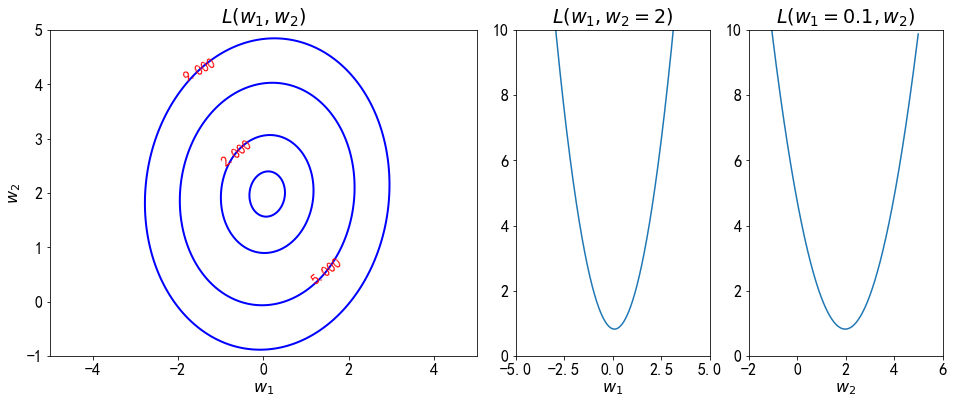

In [14]:
mpl.rcParams.update({'font.size': 16})
fig,ax = plt.subplots(1,4,figsize=(16,6))
gs = gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0,2])
ax3 = plt.subplot(gs[0,3])
levels = np.array([1,2,5,9])
CS = ax1.contour(W1,W2,L,levels,linewidths=2,colors="blue")
ax1.clabel(CS,inline=False,fontsize=14,colors='red')
ax1.set_xlabel(r'$w_1$')
ax1.set_ylabel(r'$w_2$')
ax1.set_title(r'$L(w_1,w_2)$')
ax1.set_xlim([-5,5])
ax1.set_ylim([-1,5])


ax2.plot(w1,Lw1)
ax2.set_title(r'$L(w_1,w_2=2)$')
ax2.set_xlabel(r'$w_1$')
ax2.set_xlim([-5,5])
ax2.set_ylim([0,10])


ax3.plot(w2,Lw2)
ax3.set_title(r'$L(w_1=0.1,w_2)$')
ax3.set_xlabel(r'$w_2$')
ax3.set_xlim([-2,6])
ax3.set_ylim([0,10])


# 使用梯度下降求解参数

回归模型 $y = w^Tx=w_1x_1+w_2 x_2 = x^T w $ (设模型的bias为0）  

损失函数取为均方误差(MSE)
$$ 
\begin{align}
L(w_1,w_2) &= \frac{1}{N} \sum_{i=1}^N (w_1x_1^i+w_2 x_2^i-y^i)^2 \\
&=  \frac{1}{N} \sum_{i=1}^N ([x^i]^Tw-y^i)^2 \\
&= \frac{1}{N} (Xw-y)^T(Xw-y)
\end{align}
$$    

梯度  
$$
\begin{align}
\nabla_w L(w_1,w_2) &=
 \begin{bmatrix} \nabla_{w_1} L(w_1,w_2) \\ \nabla_{w_2} L(w_1,w_2)  \\ \end{bmatrix} \\
 &= \begin{bmatrix} \frac{2}{N} \sum_{i=1}^N ([x^i]^Tw-y^i)x^i_1 \\ \frac{2}{N} \sum_{i=1}^N ([x^i]^Tw-y^i)x^i_2  \\ \end{bmatrix} \\
&=  \frac{2}{N}[(Xw-y)^T X]^T
\end{align}
$$

参数更新  
$$w = w-\eta*\nabla_w L(w_1,w_2)$$



In [15]:
class  LinearRegression(object):
        '''
        使用梯度下降算法求解线性回归的参数
        X: n*2
        y: n*1
        w: 2*1
        '''
        def __init__(self,w0,X,y):
            self.X = X
            self.y = y
            self.data_size = len(y)   
            
            self.w = w0
            self.history = dict()
            self.history['para']= w0
            self.history['loss'] = self.loss()[0]
  
        def loss(self):
            error = self.X.dot(self.w)-self.y
            SE = np.dot(error.T,error)
            return SE/self.data_size
        def gradient(self,w):
            error = self.X.dot(self.w)-self.y
            gradient_w = np.dot(error.T,self.X)*2/self.data_size
            return gradient_w.T
        def train(self,lr=0.2,niter=10):
            for i in range(1,1+niter):
                self.w = self.w - lr*self.gradient(self.w)
                self.history['para'] = np.hstack([self.history['para'],self.w])
                self.history['loss'] = np.append(self.history['loss'],self.loss()[0])
            print('Final Loss=',self.loss()[0])
        

In [16]:
X = np.hstack([x1s,x2s])
y = ys
w0 = np.array([[-7.5],[-0.5]])
olr = LinearRegression(w0=w0,X=X,y=y)
olr.train(lr=0.011,niter=500)
# lr>=0.012发散

Final Loss= [0.87366128]


In [17]:
Xnorm = np.hstack([x1s_norm,x2s_norm])
y = ys
w0 = np.array([[-2],[0]])
olr_norm = LinearRegression(w0=w0,X=Xnorm,y=y)
olr_norm.train(lr=0.1,niter=50)

Final Loss= [0.82737684]


# 展示动态更新图形

In [18]:
from matplotlib import animation, rc
from IPython.display import HTML

## 原始数据

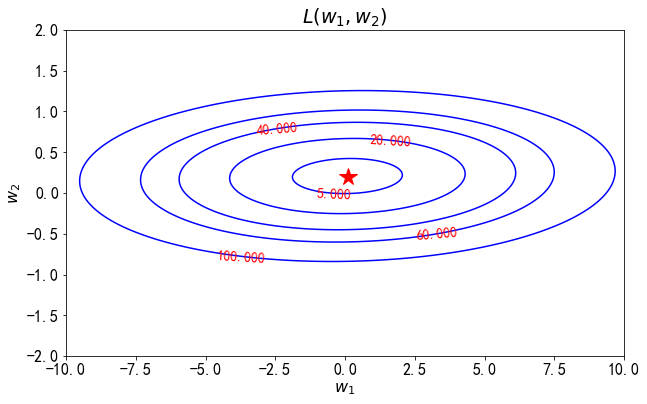

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
levels = np.array([5,20,40,60,100])
CS = ax.contour(W1_,W2_,L_,levels,linewidths=1.5,colors="blue")
ax.clabel(CS,inline=False,fontsize=14,colors='red')
ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_title(r'$L(w_1,w_2)$')
ax.set_xlim([-10,10])
ax.set_ylim([-2,2])

ax.plot(0.1,0.2, 'r*', markersize=18)

line, = ax.plot([], [], 'r-', lw=2,animated=False)
point, = ax.plot([], [], 'r*')

In [20]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*olr.history['para'][::,:i])
    point.set_data(*olr.history['para'][::,i-1:i])
    return line, point


In [21]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=olr.history['para'].shape[1], interval=50, 
                               repeat_delay=5, blit=True)

In [22]:
HTML(anim.to_html5_video())

## 标准化后数据

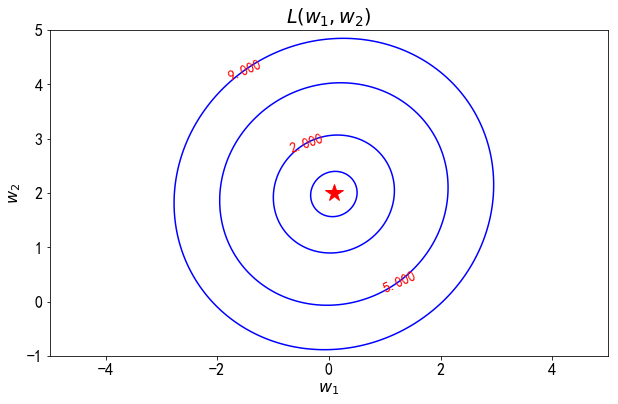

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
levels = np.array([1,2,5,9])
CS = ax.contour(W1,W2,L,levels,linewidths=1.5,colors="blue")
ax.clabel(CS,inline=False,fontsize=14,colors='red')
ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_title(r'$L(w_1,w_2)$')
ax.set_xlim([-5,5])
ax.set_ylim([-1,5])

ax.plot(0.1,2, 'r*', markersize=18)

line, = ax.plot([], [], 'r-', lw=3)
point, = ax.plot([], [], 'r*')

In [24]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*olr_norm.history['para'][::,:i])
    point.set_data(*olr_norm.history['para'][::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=olr_norm.history['para'].shape[1], interval=200, 
                               repeat_delay=5, blit=True)

HTML(anim.to_html5_video())

## 损失函数随迭代的变化

In [38]:
w0 = np.array([[-7.5],[-0.5]])
olr2 = LinearRegression(w0=w0,X=X,y=y)
olr2.train(lr=0.0111,niter=500)

Final Loss= [3753763.29341221]


(0, 200)

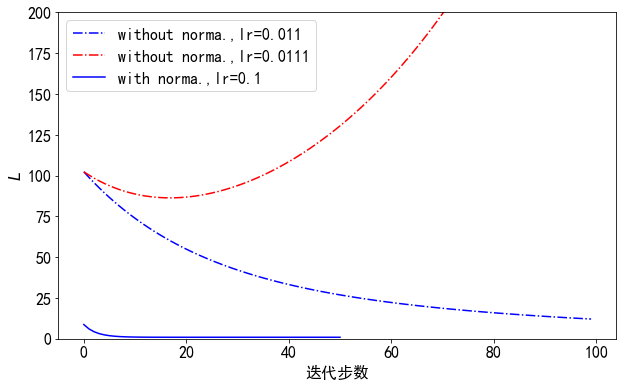

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(olr.history['loss'][:100],'b-.')
plt.plot(olr2.history['loss'][:100],'r-.')
plt.plot(olr_norm.history['loss'],'b-')
plt.legend(['without norma.,lr=0.011','without norma.,lr=0.0111','with norma.,lr=0.1'])
plt.xlabel(u'迭代步数')
plt.ylabel(u'$L$')
plt.ylim([0,200])